# Définition du problème

Le problème abordé dans cette étude consiste à utiliser des algorithmes d'apprentissage automatique pour prédire le risque de crises cardiaques chez les patients en se basant sur un ensemble de données contenant des informations médicales et démographiques. L'objectif est de fournir une méthode moins coûteuse et efficace pour évaluer le risque d'attaque cardiaque, en utilisant des techniques telles que la régression logistique, les machines à vecteurs de support (SVM), les algorithmes du plus proche voisin, NaiveBayes et Random Forest.

L'ensemble de données utilisé dans cette étude contient des informations sur 303 patients, notamment des variables telles que la douleur thoracique, les résultats de l'ECG, la pente du ST, le taux de glucose à jeun, le sexe, la tension artérielle au repos, l'âge, le taux de cholestérol, la fréquence cardiaque maximale au repos, l'angine induite par l'exercice, la dépression ST induite par l'exercice, le nombre de vaisseaux sanguins principaux, le type de défaut, ainsi que la variable cible, qui indique le risque de crise cardiaque.

L'objectif est d'exploiter ces données pour construire un modèle prédictif capable d'identifier les patients à risque élevé de crise cardiaque, ce qui pourrait contribuer à améliorer les stratégies de prévention et de gestion des maladies cardiovasculaires.

# Caractéristiques et étiquettes dans l'ensemble de données
* age - Âge des patients
* sex - Sexe des patients
* cp - Type de douleur thoracique
* trestbps - Pression artérielle au repos
* chol - Cholestérol sérique
* fbs - Glycémie à jeun
* restecg - Résultats électrocardiographiques au repos
* thalachh - Fréquence cardiaque maximale atteinte
* exng - Angine induite par l'exercice
* oldpeak - Dépression ST induite par l'exercice par rapport au repos
* slp - Pente du pic
* caa - Anomalies des artères coronaires
* thall - Type de défaut

# Exploration des données ::



In [156]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns



In [157]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [158]:
df.size

4242

In [159]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [160]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'], dtype='object')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [162]:
df.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [163]:
df.output.value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [164]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [165]:
corr=df.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


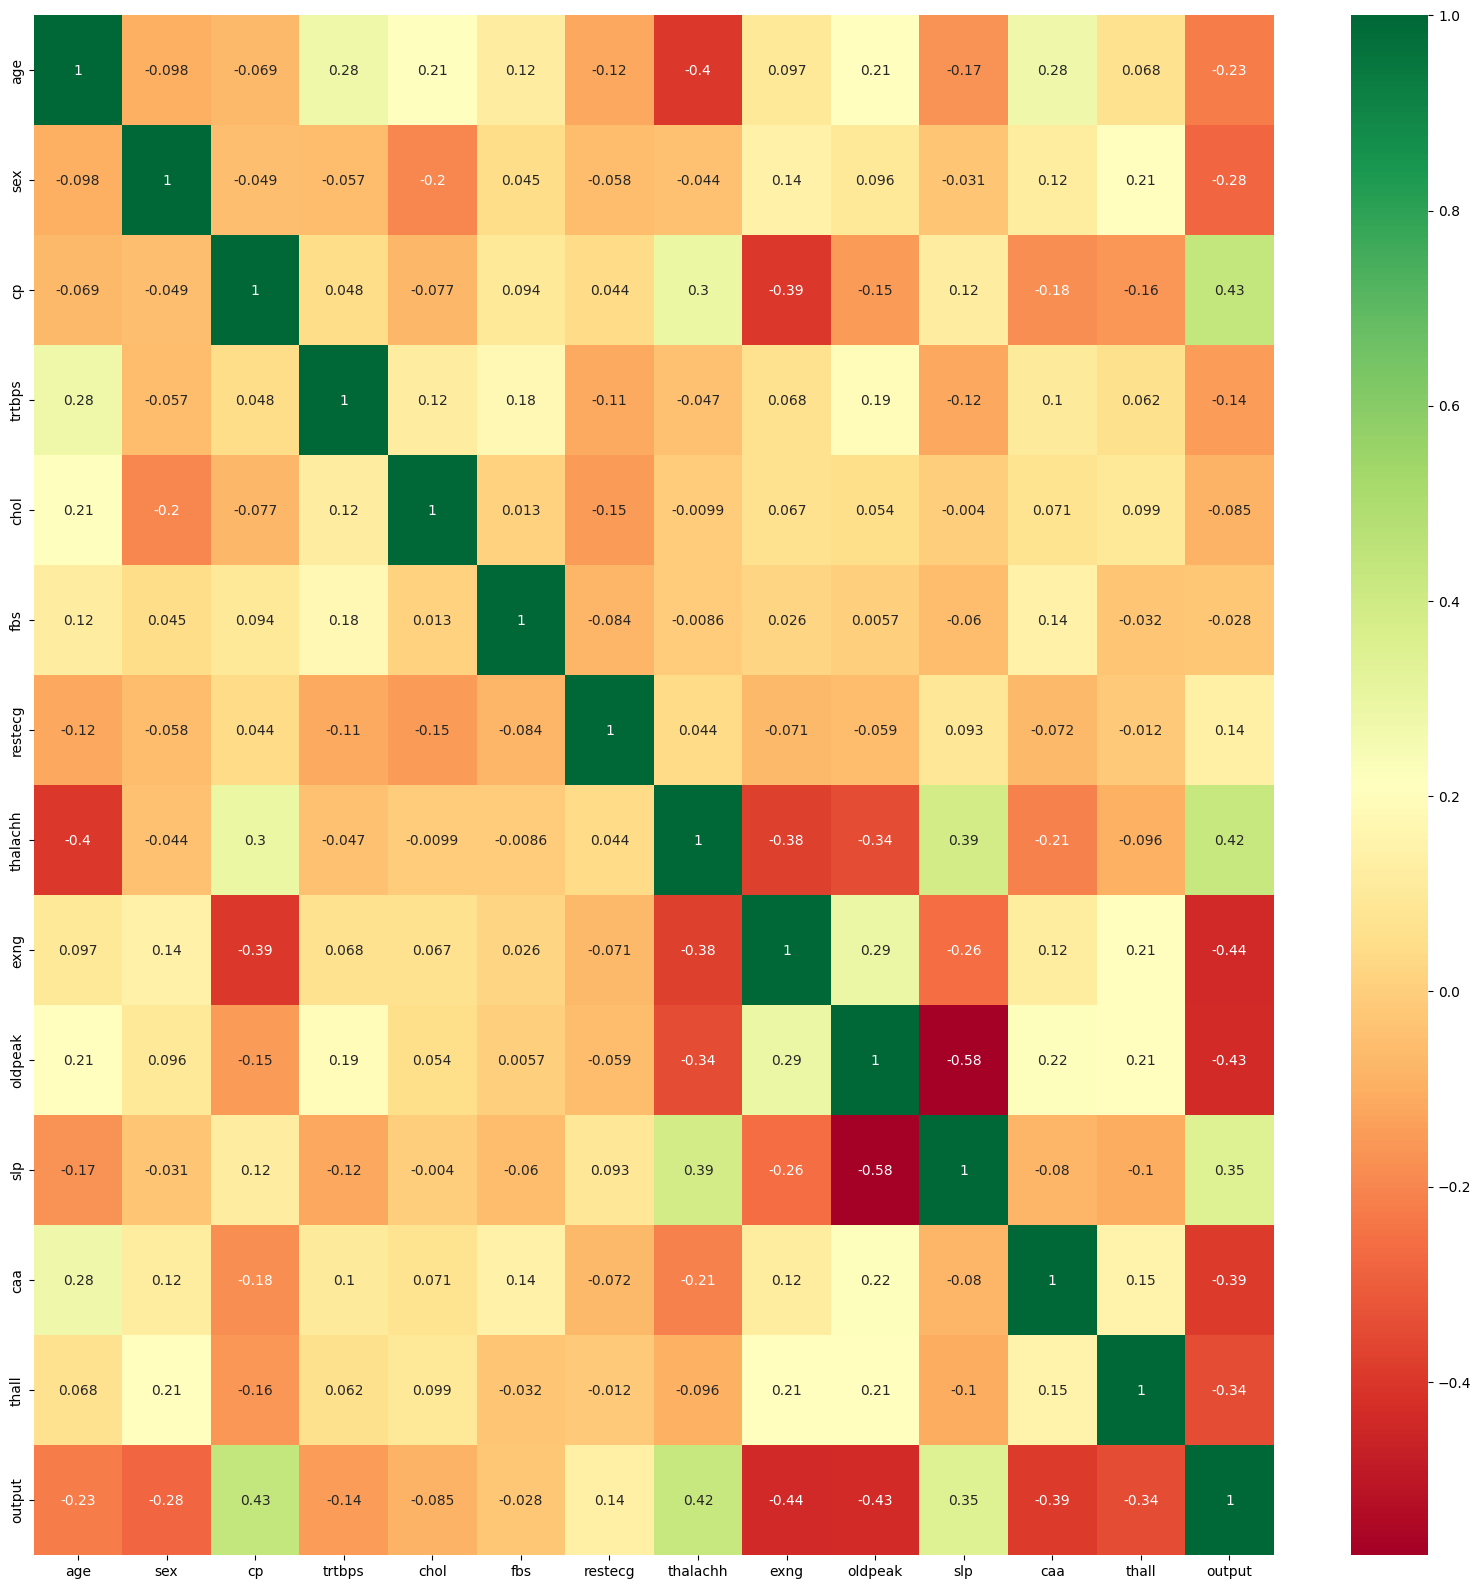

In [166]:


top_corr_features = corr.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\Nessrine\AppData\Local\Temp\ipykernel_15044\3716091685.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



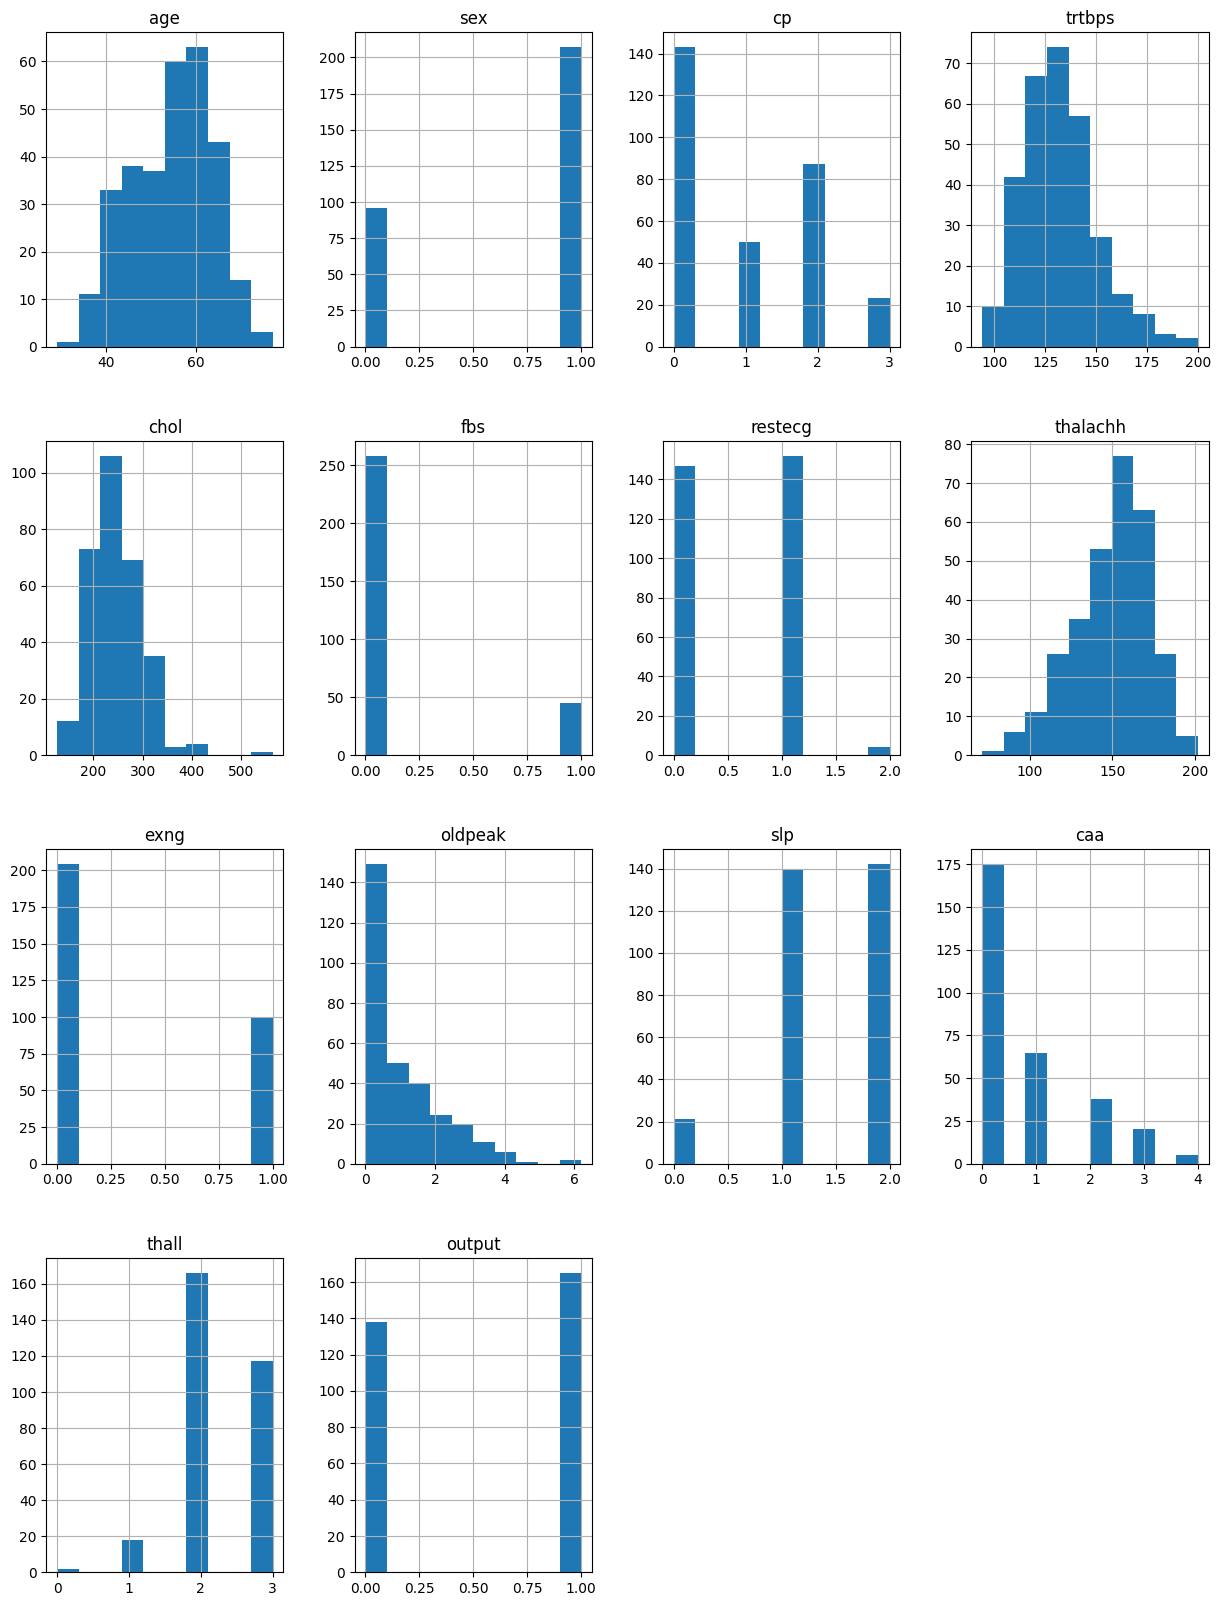

In [167]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

<AxesSubplot:>

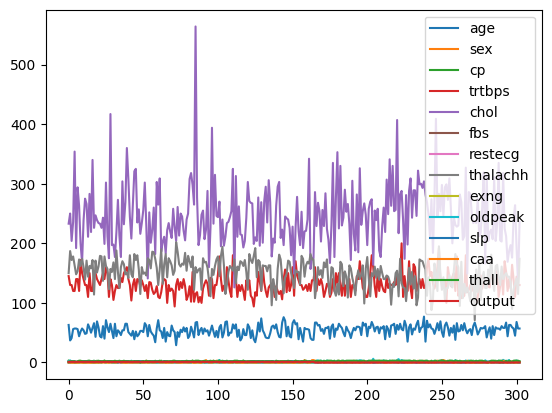

In [168]:
df.plot()

In [169]:
data=df
young_ages=data[(data.age>=29)&(data.age<40)]
middle_ages=data[(data.age>=40)&(data.age<55)]
elderly_ages=data[(data.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


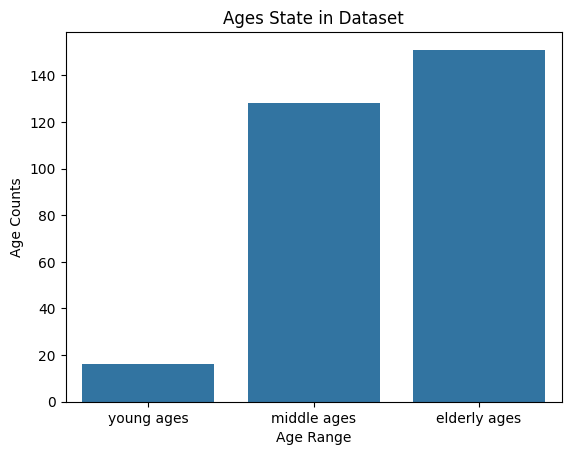

In [170]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

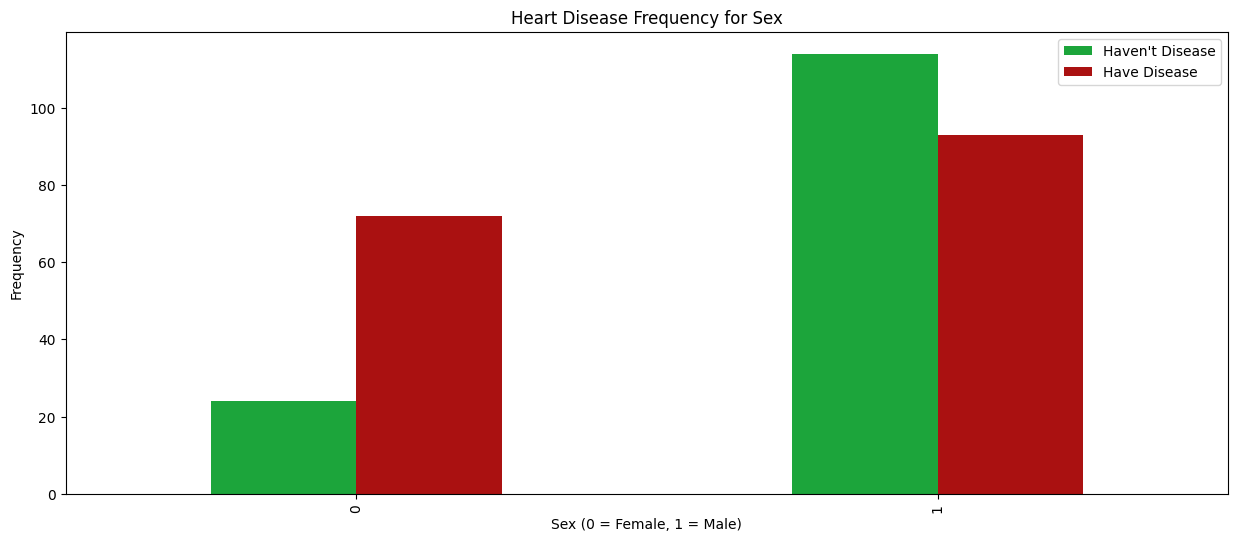

In [171]:
pd.crosstab(df.sex,df.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

AxesSubplot(0.1275,0.11;0.77x0.77)


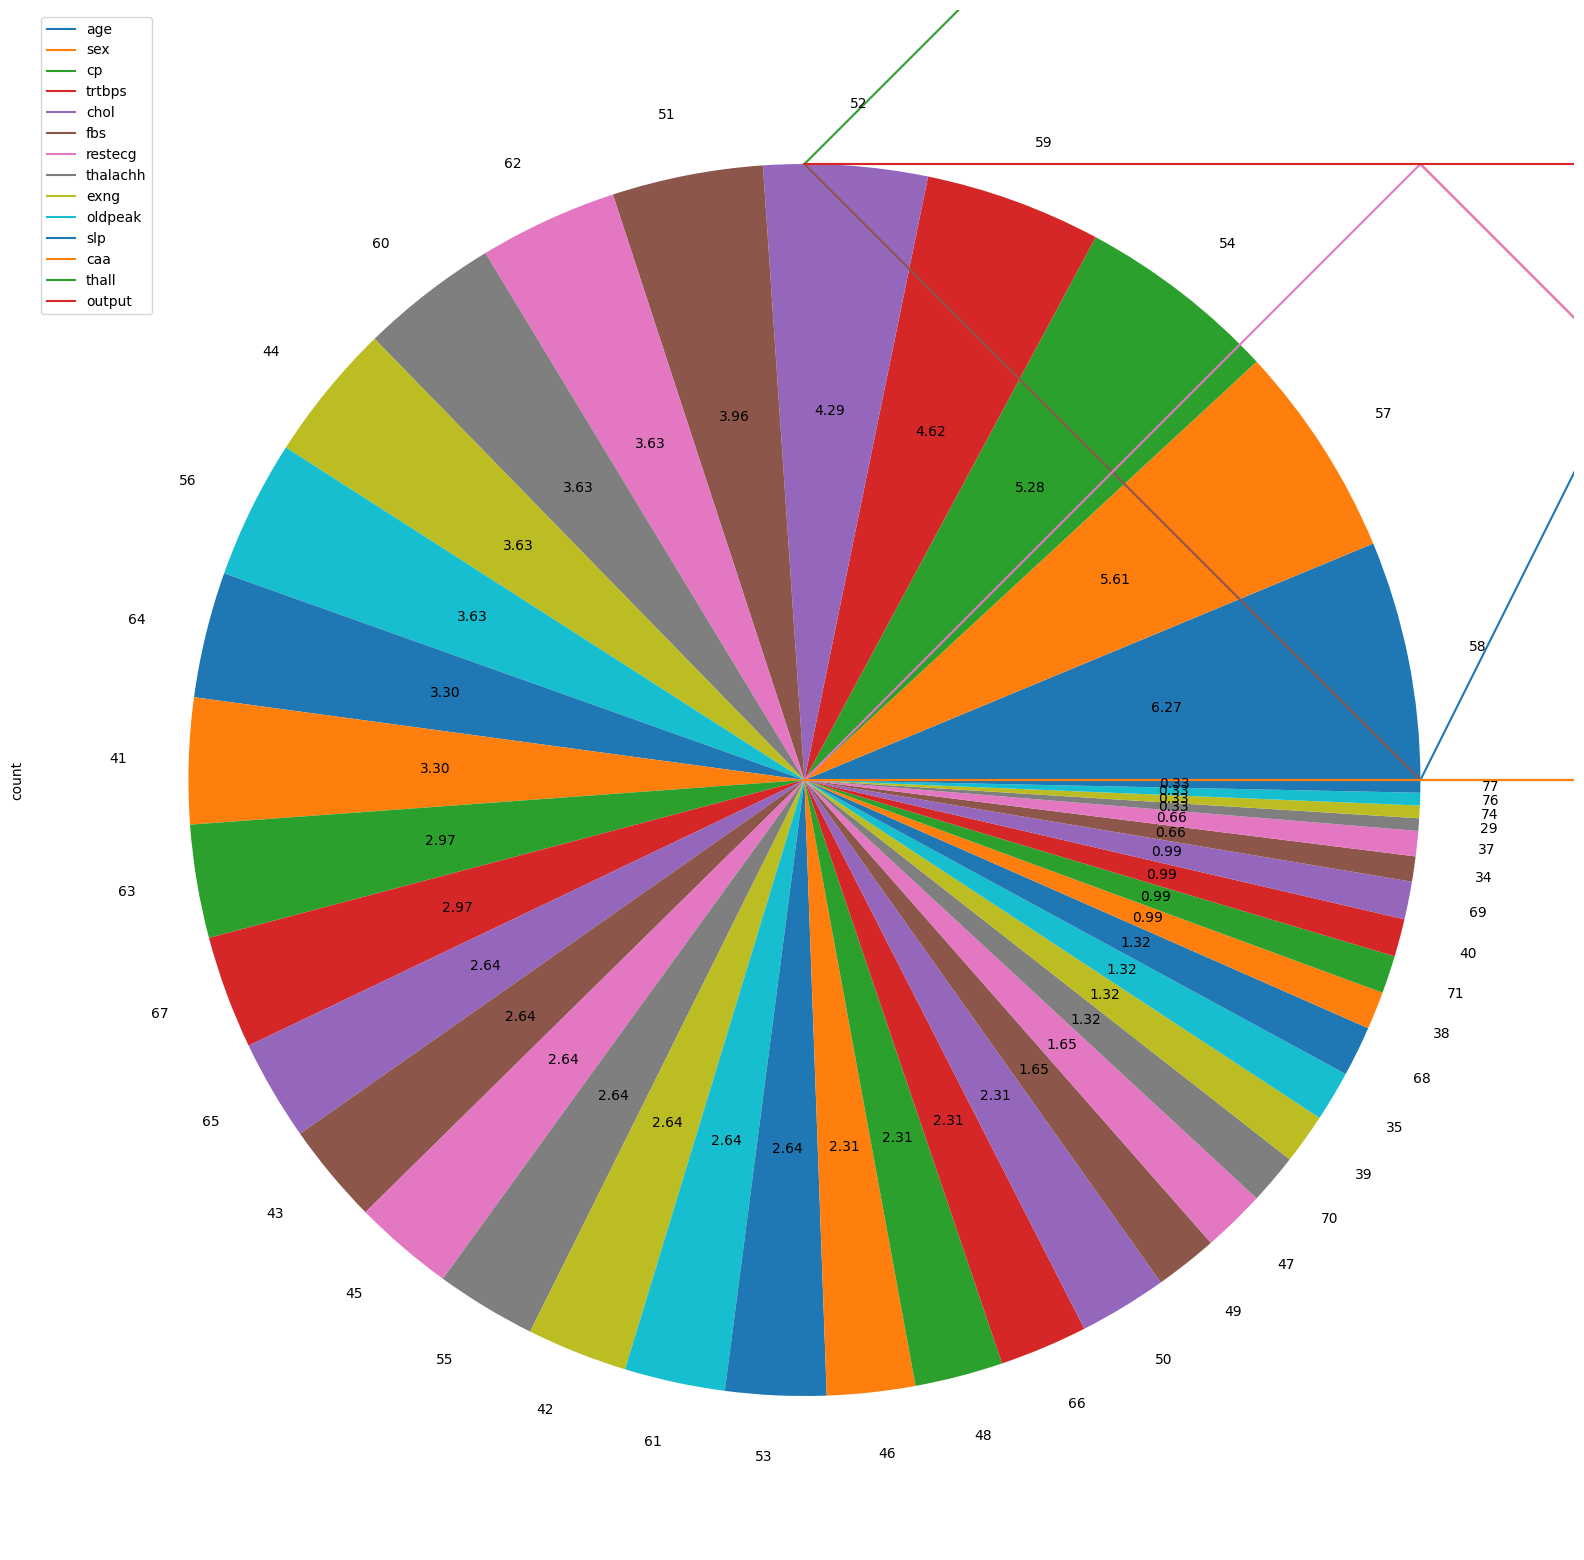

In [172]:
df.plot(figsize=(20,20))
print(df['age'].value_counts().plot(kind='pie',autopct='%.2f'))

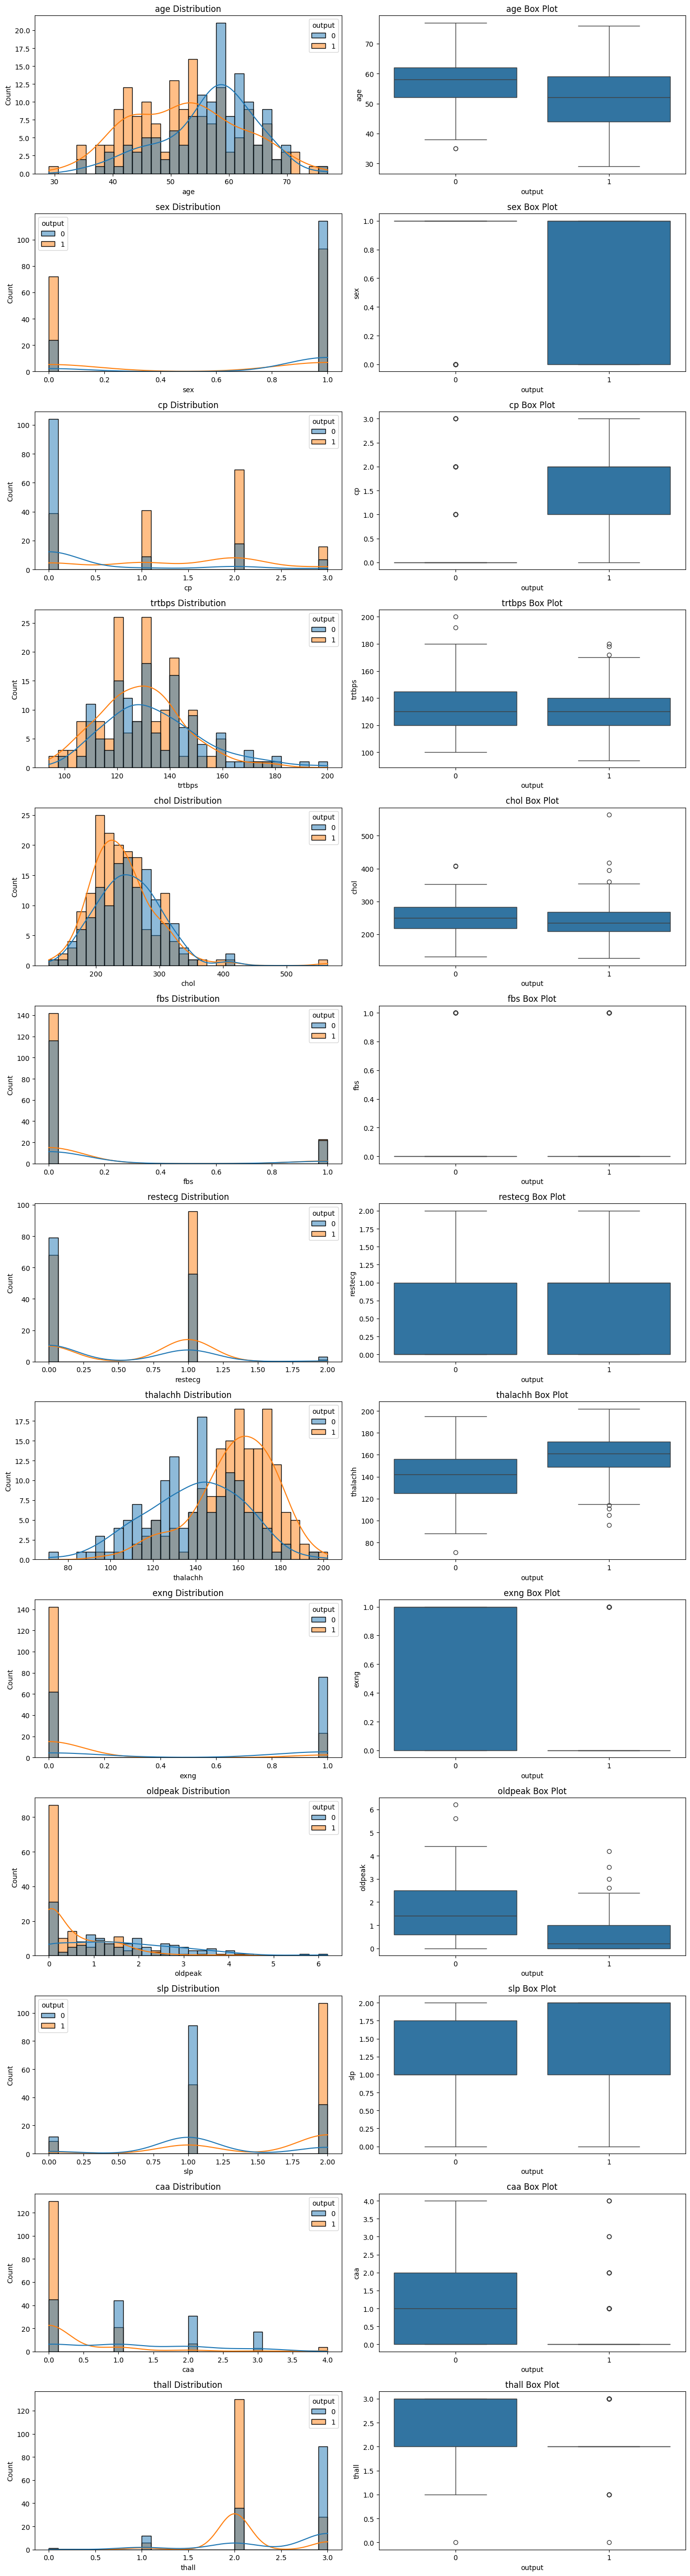

In [173]:
num_variables = data.select_dtypes(include=[np.number]).columns.tolist()
num_variables.remove('output')

fig, ax = plt.subplots(len(num_variables), 2, figsize=(14, len(num_variables)*4))

for idx, column in enumerate(num_variables):
    sns.histplot(x=column, hue="output", data=data, bins=30, kde=True,ax=ax[idx,0])
    ax[idx,0].set_title(f"{column} Distribution")

    sns.boxplot(x='output', y=column, data=data, ax=ax[idx,1])
    ax[idx,1].set_title(f"{column} Box Plot")

plt.tight_layout()
plt.show()

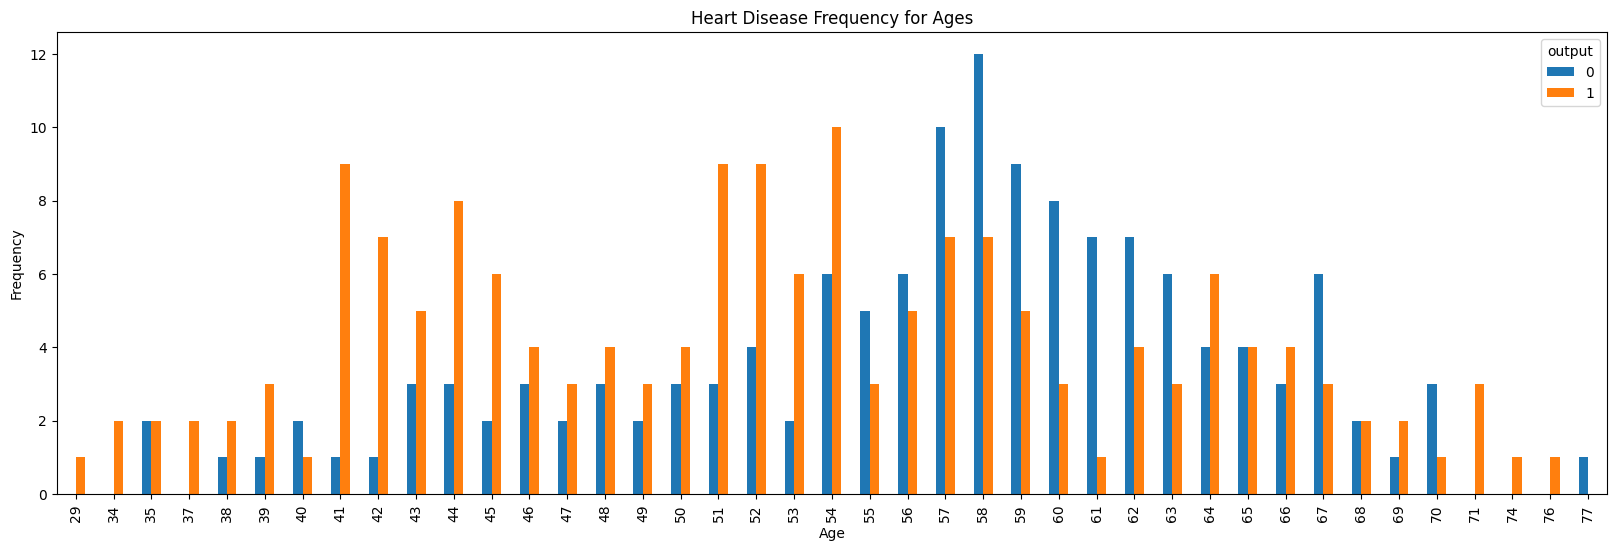

In [174]:
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

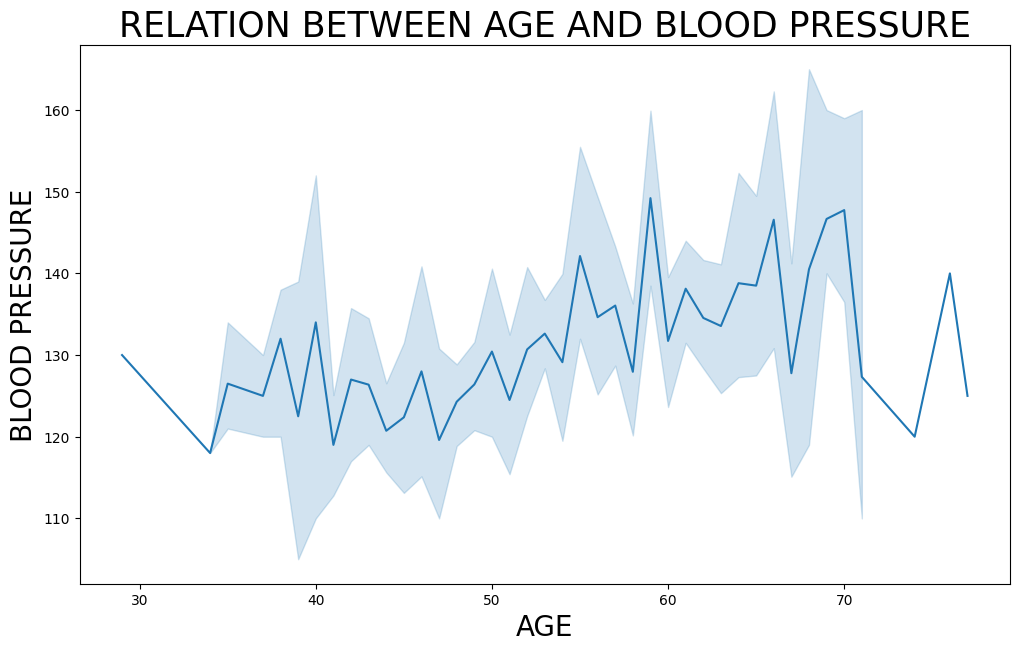

In [175]:
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='trtbps',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('BLOOD PRESSURE',fontsize=20)
plt.title('RELATION BETWEEN AGE AND BLOOD PRESSURE',fontsize=25)
plt.show()

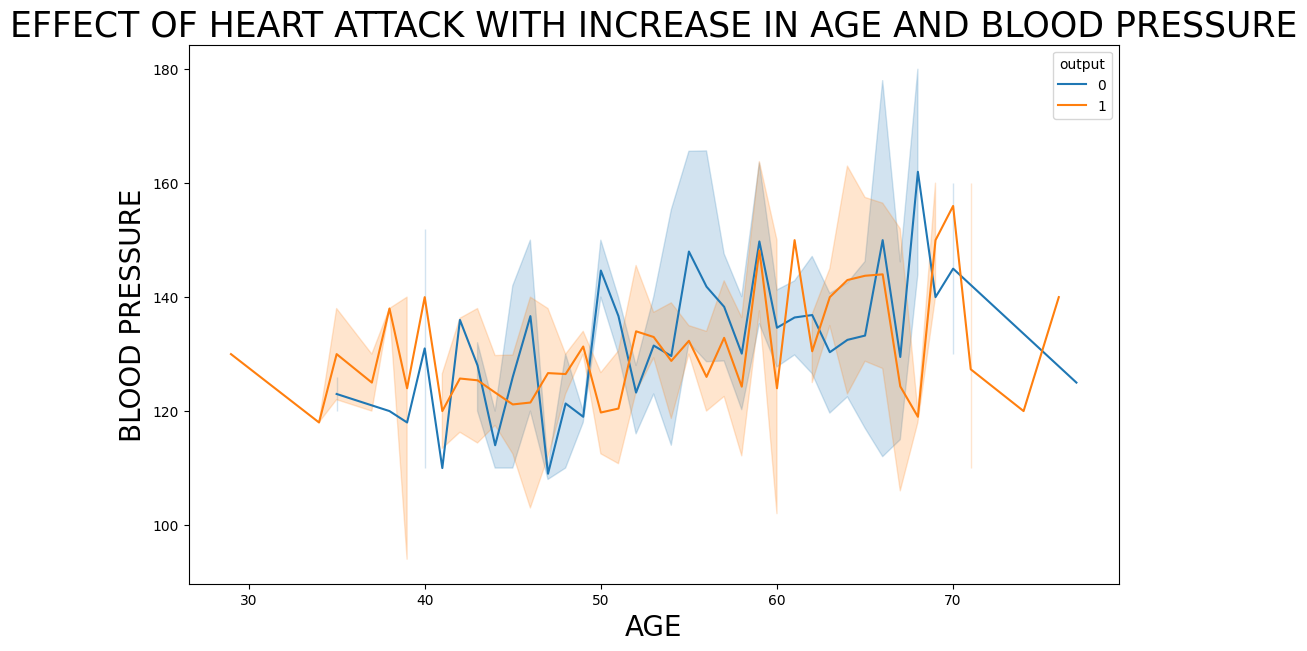

In [176]:
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='trtbps',hue='output',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('BLOOD PRESSURE',fontsize=20)
plt.title('EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND BLOOD PRESSURE',fontsize=25)
plt.show()

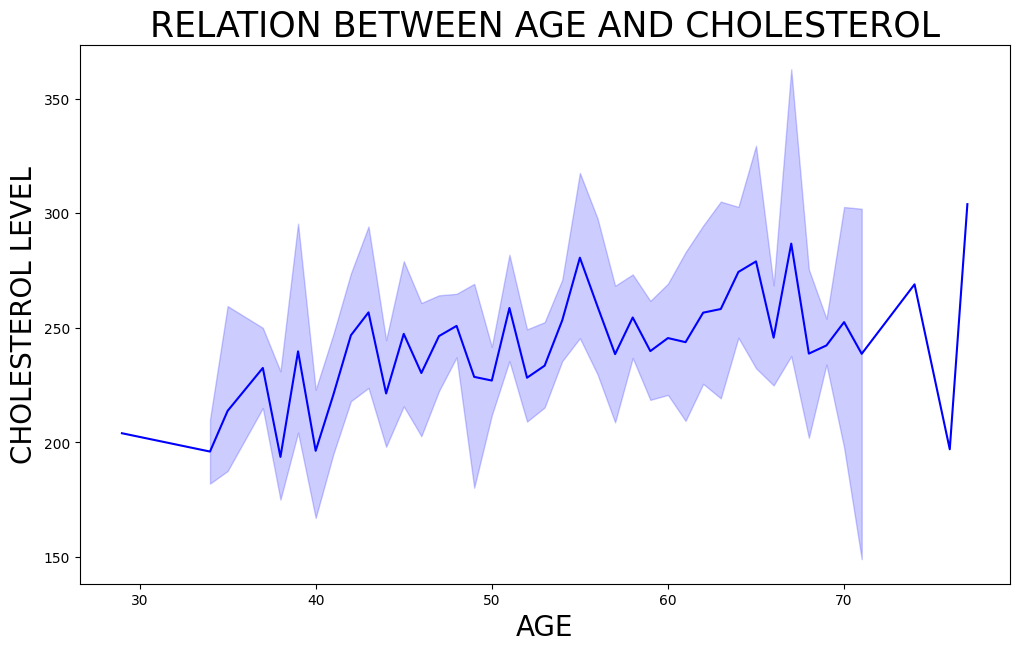

In [177]:
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='chol',color='blue',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('CHOLESTEROL LEVEL',fontsize=20)
plt.title('RELATION BETWEEN AGE AND CHOLESTEROL',fontsize=25)
plt.show()

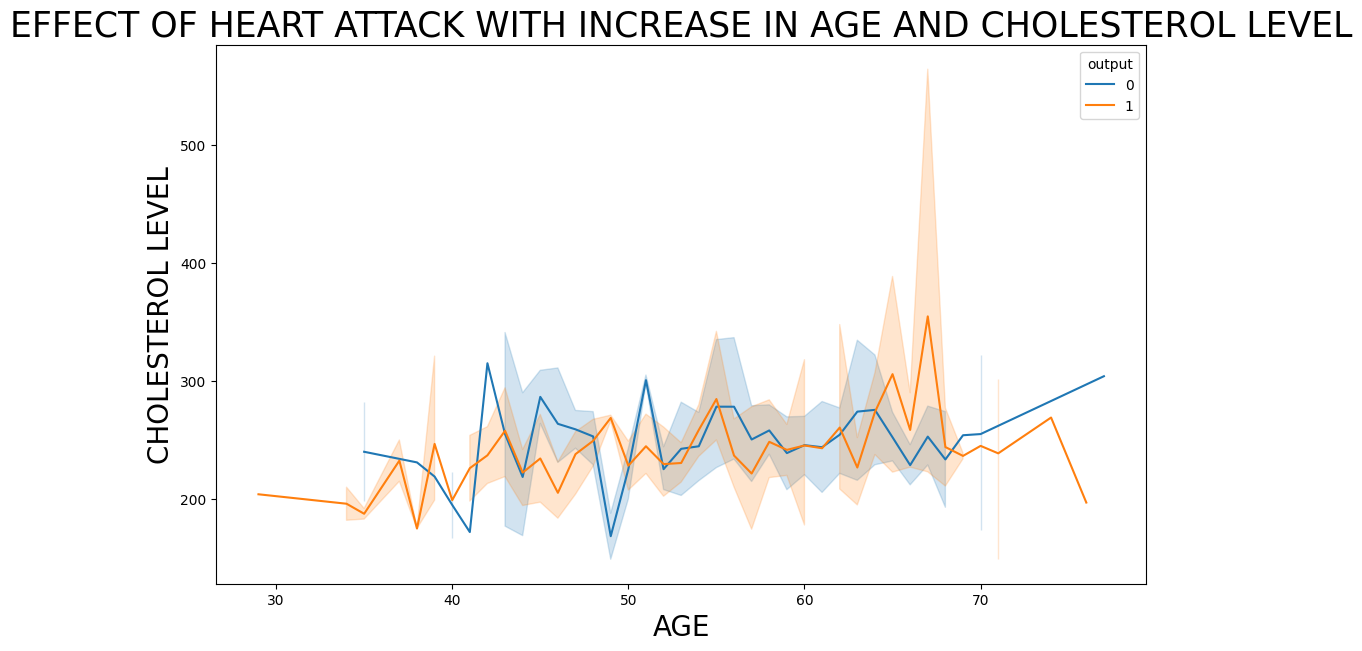

In [178]:
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='chol',hue='output',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('CHOLESTEROL LEVEL',fontsize=20)
plt.title('EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND CHOLESTEROL LEVEL',fontsize=25)
plt.show()

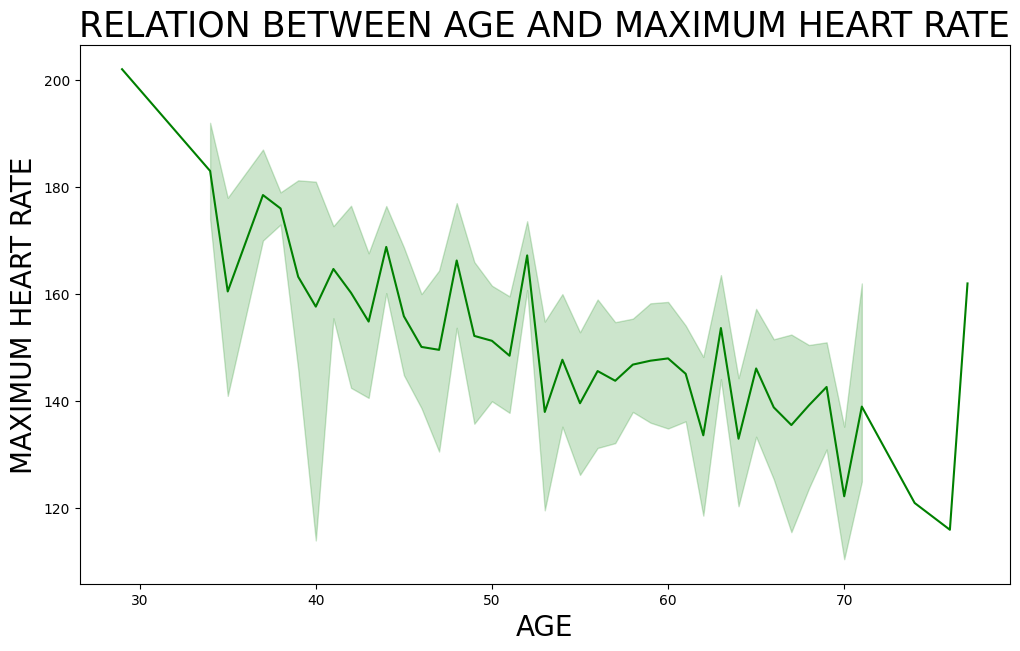

In [179]:
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='thalachh',color='green',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('MAXIMUM HEART RATE',fontsize=20)
plt.title('RELATION BETWEEN AGE AND MAXIMUM HEART RATE',fontsize=25)
plt.show()

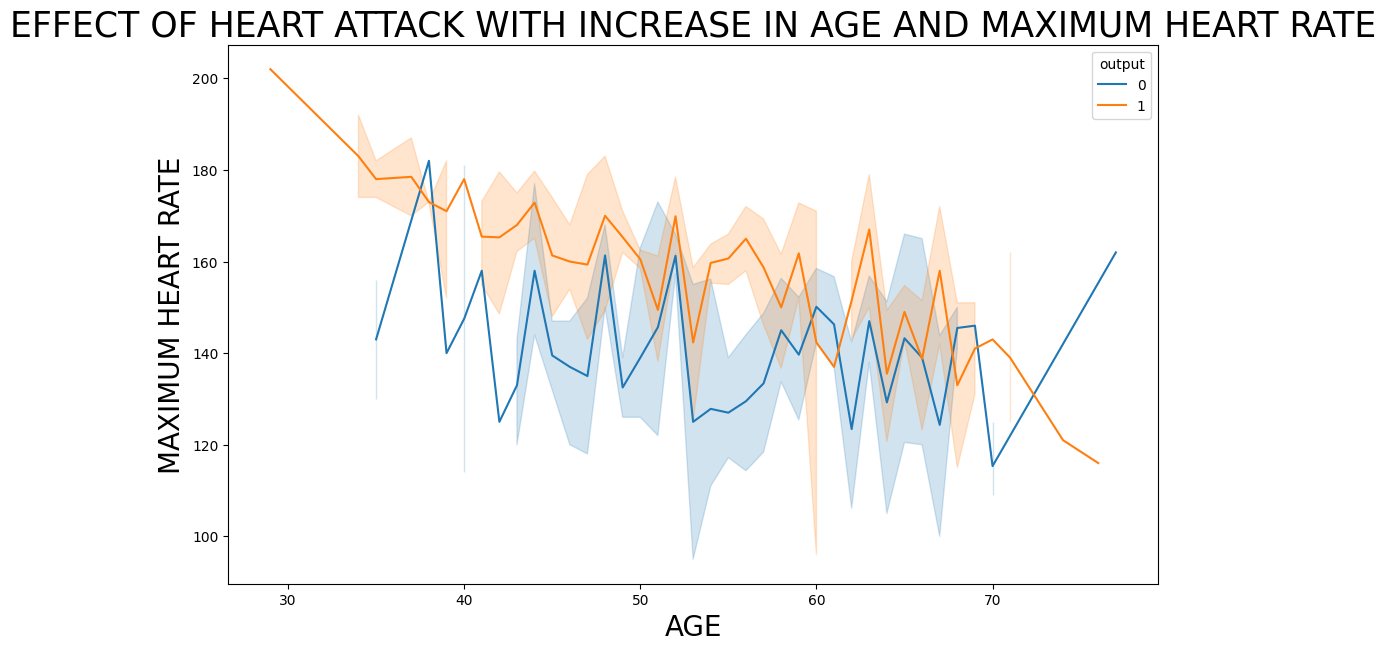

In [180]:
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='thalachh',hue='output',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('MAXIMUM HEART RATE',fontsize=20)
plt.title('EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND MAXIMUM HEART RATE',fontsize=25)
plt.show()

In [181]:
no= df[df['output']==0]['age'].value_counts().sort_index(ascending=True)
yes= df[df['output']==1]['age'].value_counts().sort_index(ascending=True)

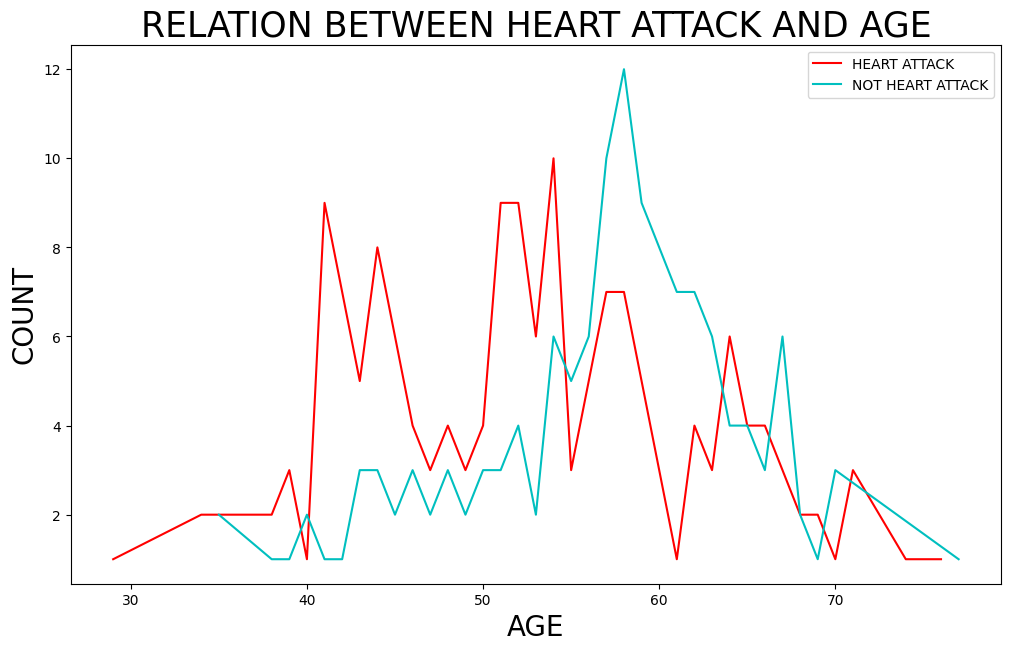

In [182]:
plt.figure(figsize=(12,7))
plt.plot(yes,c='r',label='HEART ATTACK')
plt.plot(no,c='c',label='NOT HEART ATTACK')
plt.xlabel('AGE',fontsize=20)
plt.ylabel('COUNT',fontsize=20)
plt.title('RELATION BETWEEN HEART ATTACK AND AGE',fontsize=25)
plt.legend()
plt.show()

# Modélisation

In [183]:
x = df.drop('output', axis=1)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [184]:
y = df['output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [186]:
ml_algorithms = {}

### Logistic Regression

In [187]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [188]:
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [189]:
# accuracy
log_model.score(x_train, y_train)

0.8636363636363636

In [190]:
# predict
predict_log_model = log_model.predict(x_test)
predict_log_model


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [191]:
cm_log_model = metrics.confusion_matrix(y_test, predict_log_model)
print(cm_log_model)

[[25  4]
 [ 3 29]]


In [192]:
fig = px.imshow(img=cm_log_model, text_auto=True)
fig.show()

In [193]:
tp,fn,fp,tn = cm_log_model.reshape(-1)
print(tp,fn,fp,tn)

25 4 3 29


In [194]:
# accuracy calculation de LR
accuracyLR = (tp + tn) / (tp + tn + fp + fn)
accuracyLR

0.8852459016393442

In [195]:
precisionLR = tp / (tp + fp)
precisionLR

0.8928571428571429

In [196]:
sensitivityLR = tp / (tp + fn)
sensitivityLR

0.8620689655172413

In [197]:
SpecificityLR = tn / (tn + fp)
SpecificityLR

0.90625

In [198]:
f1_scoreLR=(2*precisionLR*sensitivityLR)/(precisionLR+sensitivityLR)
f1_scoreLR

0.8771929824561403

In [199]:
report_predict_log_model = classification_report(y_test, predict_log_model)
print(report_predict_log_model)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [200]:
log_model_accuracy = accuracy_score(y_test, predict_log_model)
log_model_accuracy

0.8852459016393442

In [201]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np



# Appliquez la validation croisée avec k=5 plis
cv_scores = cross_val_score(log_model, x_train, y_train, cv=5, scoring='accuracy')

# Affichez les scores de validation croisée pour chaque pli
print("Cross-validation scores:", cv_scores)

# Calculez la moyenne des scores de validation croisée
mean_cv_score1 = np.mean(cv_scores)
print("Mean cross-validation score:", mean_cv_score1)


Cross-validation scores: [0.79591837 0.87755102 0.77083333 0.83333333 0.79166667]
Mean cross-validation score: 0.8138605442176872


In [202]:
ml_algorithms['Logistic Regression'] = log_model_accuracy

In [203]:
print('Accuracy score: ',accuracyLR)
print('Precision score: ',precisionLR)
print('sensitivity: ',sensitivityLR)
print('Specificity: ',SpecificityLR)
print('F1 score: ',f1_scoreLR)
print('Mean cross-validation score:', mean_cv_score1)

Accuracy score:  0.8852459016393442
Precision score:  0.8928571428571429
sensitivity:  0.8620689655172413
Specificity:  0.90625
F1 score:  0.8771929824561403
Mean cross-validation score: 0.8138605442176872


## 2.2.2. Support vector machine

In [204]:
svm = SVC(kernel='linear' ,probability=True)
svm.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [205]:
svm.score(x_test, y_test)

0.8688524590163934

In [206]:
predict_svm = svm.predict(x_test)
predict_svm

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [207]:
cm_svm = confusion_matrix(y_test, predict_svm)
cm_svm

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [208]:
fig = px.imshow(img=cm_svm, text_auto=True)
fig.show()

In [209]:
tp,fn,fp,tn = cm_svm.reshape(-1)
print(tp,fn,fp,tn)



25 4 4 28


In [210]:
# accuracy calculation
accuracySVM = (tp + tn) / (tp + tn + fp + fn)
accuracySVM



0.8688524590163934

In [211]:
precisionSVM = tp / (tp + fp)
precisionSVM




0.8620689655172413

In [212]:
sensitivitySVM = tp / (tp + fn)
sensitivitySVM



0.8620689655172413

In [213]:
SpecificitySVM = tn / (tn + fp)
SpecificitySVM



0.875

In [214]:
f1_scoreSVM =(2*precisionSVM*sensitivitySVM)/(precisionSVM+sensitivitySVM)
f1_scoreSVM



0.8620689655172413

In [215]:
report_predict_svm = classification_report(y_test, predict_svm)
print(report_predict_svm)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [216]:
svm_accuracy = accuracy_score(y_test, predict_svm)
svm_accuracy

0.8688524590163934

In [217]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np


# Appliquez la validation croisée avec k=5 plis
cv_scoresSVM = cross_val_score(svm, x_train, y_train, cv=5, scoring='accuracy')

# Affichez les scores de validation croisée pour chaque pli
print("Cross-validation scores:", cv_scoresSVM)

# Calculez la moyenne des scores de validation croisée
mean_cv_score2 = np.mean(cv_scoresSVM)
print("Mean cross-validation score:", mean_cv_score2)


Cross-validation scores: [0.7755102  0.89795918 0.79166667 0.8125     0.79166667]
Mean cross-validation score: 0.8138605442176872


In [218]:

print('Accuracy score: ',accuracySVM)
print('Precision score: ',precisionSVM)
print('sensitivity: ',sensitivitySVM)
print('Specificity: ',SpecificitySVM)

print('F1 score: ', f1_scoreSVM)
print('Mean cross-validation score:',mean_cv_score2)

Accuracy score:  0.8688524590163934
Precision score:  0.8620689655172413
sensitivity:  0.8620689655172413
Specificity:  0.875
F1 score:  0.8620689655172413
Mean cross-validation score: 0.8138605442176872


In [219]:
ml_algorithms['Support Vector Machine'] = svm_accuracy
print(ml_algorithms)

{'Logistic Regression': 0.8852459016393442, 'Support Vector Machine': 0.8688524590163934}


## 2.2.3. Naive bayes


In [220]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train, y_train)

GaussianNB()

In [221]:
# accuracy
naive_bayes_model.score(x_train, y_train)


0.8181818181818182

In [222]:
# Prédiction
predict_naive_bayes_model = naive_bayes_model.predict(x_test)
predict_naive_bayes_model

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [223]:
# Matrice de confusion
cm_naive_bayes_model = metrics.confusion_matrix(y_test, predict_naive_bayes_model)
cm_naive_bayes_model

array([[26,  3],
       [ 5, 27]], dtype=int64)

In [224]:
fig = px.imshow(img=cm_naive_bayes_model, text_auto=True)
fig.show()

In [225]:
# Calcul des vrais positifs, faux négatifs, faux positifs et vrais négatifs
tp, fn, fp, tn = cm_naive_bayes_model.ravel()

In [226]:
accuracy_naive_bayes = (tp + tn) / (tp + tn + fp + fn)
accuracy_naive_bayes

0.8688524590163934

In [227]:
# Calcul de la précision
precision_naive_bayes = precision_score(y_test, predict_naive_bayes_model)
precision_naive_bayes

0.9

In [228]:
# Calcul de la sensibilité (recall)
sensitivity_naive_bayes = recall_score(y_test, predict_naive_bayes_model)
sensitivity_naive_bayes

0.84375

In [229]:
Specificity_naive_bayes = tn / (tn + fp)
Specificity_naive_bayes


0.84375

In [230]:
# Calcul du score F1
f1_score_naive_bayes = (2*precision_naive_bayes*sensitivity_naive_bayes)/(precision_naive_bayes+sensitivity_naive_bayes)

f1_score_naive_bayes

0.870967741935484

In [231]:
report_predict_naive_bayes = classification_report(y_test, predict_naive_bayes_model )
print(report_predict_naive_bayes)



              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [232]:
naive_bayes_accuracy = accuracy_score(y_test,predict_naive_bayes_model )
naive_bayes_accuracy


0.8688524590163934

In [233]:
ml_algorithms['Naive bayes'] = log_model_accuracy

In [234]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np



# Appliquez la validation croisée avec k=5 plis
cv_scores_NVB = cross_val_score(naive_bayes_model, x_train, y_train, cv=5, scoring='accuracy')

# Affichez les scores de validation croisée pour chaque pli
print("Cross-validation scores:", cv_scores_NVB)

# Calculez la moyenne des scores de validation croisée
mean_cv_score3 = np.mean(cv_scores_NVB)
print("Mean cross-validation score:", mean_cv_score3)


Cross-validation scores: [0.7755102  0.85714286 0.77083333 0.8125     0.72916667]
Mean cross-validation score: 0.789030612244898


In [235]:

print('Accuracy score: ',accuracy_naive_bayes)
print('Precision score: ', precision_naive_bayes)
print('sensitivity: ',sensitivity_naive_bayes)
print('Specificity: ', Specificity_naive_bayes)
print('F1 score: ', f1_score_naive_bayes)
print('Mean cross-validation score', mean_cv_score3)

Accuracy score:  0.8688524590163934
Precision score:  0.9
sensitivity:  0.84375
Specificity:  0.84375
F1 score:  0.870967741935484
Mean cross-validation score 0.789030612244898


## 2.2.4 Random Forest Classifier

In [236]:
rf_classifier = RandomForestClassifier(n_estimators= 10, criterion='entropy')
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [237]:
# accuracy
rf_classifier.score(x_train, y_train)


0.9793388429752066

In [238]:
predict_rf_classifier = rf_classifier.predict(x_test)
predict_rf_classifier

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [239]:
cm_rf_classifier = confusion_matrix(y_test, predict_rf_classifier)
cm_rf_classifier

array([[27,  2],
       [ 5, 27]], dtype=int64)

In [240]:
fig = px.imshow(img=cm_rf_classifier, text_auto=True)
fig.show()

In [241]:
tp,fn,fp,tn =cm_rf_classifier.reshape(-1)
print(tp,fn,fp,tn)

27 2 5 27


In [242]:

accuracy_RF = (tp + tn) / (tp + tn + fp + fn)
accuracy_RF



0.8852459016393442

In [243]:
precision_RF = tp / (tp + fp)
precision_RF

0.84375

In [244]:
sensitivity_RF = tp / (tp + fn)
sensitivity_RF

0.9310344827586207

In [245]:
Specificity_RF = tn / (tn + fp)
Specificity_RF

0.84375

In [246]:
f1_score_RF=(2*precisionLR*sensitivityLR)/precisionLR+sensitivityLR
f1_score_RF

2.586206896551724

In [247]:
report_predict_rf_classifier = classification_report(y_test, predict_rf_classifier)
print(report_predict_rf_classifier)

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [248]:
rf_classifier_accuracy = accuracy_score(y_test, predict_rf_classifier)
rf_classifier_accuracy

0.8852459016393442

In [249]:
ml_algorithms['Random forest'] = log_model_accuracy

In [250]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np



# Appliquez la validation croisée avec k=5 plis
cv_scores_RF = cross_val_score(rf_classifier, x_train, y_train, cv=5, scoring='accuracy')

# Affichez les scores de validation croisée pour chaque pli
print("Cross-validation scores:", cv_scores_RF)

# Calculez la moyenne des scores de validation croisée
mean_cv_score4 = np.mean(cv_scores_RF)
print("Mean cross-validation score:", mean_cv_score4)

Cross-validation scores: [0.81632653 0.79591837 0.83333333 0.8125     0.79166667]
Mean cross-validation score: 0.8099489795918368


In [251]:

print('Accuracy score: ',accuracy_RF)
print('Precision score: ',precision_RF)
print('sensitivity: ',sensitivity_RF)
print('Specificity: ', Specificity_RF)
print('F1 score: ',f1_score_RF)
print('Mean cross-validation score',mean_cv_score4)

Accuracy score:  0.8852459016393442
Precision score:  0.84375
sensitivity:  0.9310344827586207
Specificity:  0.84375
F1 score:  2.586206896551724
Mean cross-validation score 0.8099489795918368


## 2.2.5. K-nearest neighbor algorithm

In [252]:
kn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
kn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [253]:
# accuracy
kn_classifier.score(x_train, y_train)

0.7603305785123967

In [254]:
predict_kn_classifier = kn_classifier.predict(x_test)

In [255]:
cm_kn_classifier = confusion_matrix(y_test, predict_kn_classifier)
cm_kn_classifier

array([[18, 11],
       [ 8, 24]], dtype=int64)

In [256]:
fig = px.imshow(img=cm_kn_classifier, text_auto=True)
fig.show()

In [257]:
tp,fn,fp,tn = cm_kn_classifier.reshape(-1)
print(tp,fn,fp,tn)

18 11 8 24


In [258]:
accuracy_KNN = (tp + tn) / (tp + tn + fp + fn)
accuracy_KNN

0.6885245901639344

In [259]:
precision_KNN = tp / (tp + fp)
precision_KNN

0.6923076923076923

In [260]:
sensitivity_KNN = tp / (tp + fn)
sensitivity_KNN

0.6206896551724138

In [261]:
Specificity_KNN = tn / (tn + fp)
Specificity_KNN

0.75

In [262]:
f1_score_KNN=(2*precision_KNN * sensitivity_KNN)/(precision_KNN +sensitivity_KNN)
f1_score_KNN

0.6545454545454545

In [263]:
report_predict_kn_classifier = classification_report(y_test, predict_kn_classifier)
print(report_predict_kn_classifier)

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [264]:
kn_classifier_accuracy = accuracy_score(y_test, predict_kn_classifier)
kn_classifier_accuracy

0.6885245901639344

In [265]:
ml_algorithms['K-nearest neighbor algorithm'] = kn_classifier_accuracy
print(ml_algorithms)

{'Logistic Regression': 0.8852459016393442, 'Support Vector Machine': 0.8688524590163934, 'Naive bayes': 0.8852459016393442, 'Random forest': 0.8852459016393442, 'K-nearest neighbor algorithm': 0.6885245901639344}


In [266]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np



# Appliquez la validation croisée avec k=5 plis
cv_scores_KN = cross_val_score(kn_classifier, x_train, y_train, cv=5, scoring='accuracy')

# Affichez les scores de validation croisée pour chaque pli
print("Cross-validation scores:", cv_scores_KN)

# Calculez la moyenne des scores de validation croisée
mean_cv_score5 = np.mean(cv_scores_KN)
print("Mean cross-validation score:", mean_cv_score5)

Cross-validation scores: [0.6122449  0.67346939 0.625      0.5625     0.77083333]
Mean cross-validation score: 0.6488095238095238


In [267]:

print('Accuracy score: ',accuracy_KNN)
print('Precision score: ',precision_KNN)
print('sensitivity: ',sensitivity_KNN)
print('Specificity: ',Specificity_KNN)
print('F1 score: ',f1_score_KNN)
print('Mean cross-validation score:',mean_cv_score5)

Accuracy score:  0.6885245901639344
Precision score:  0.6923076923076923
sensitivity:  0.6206896551724138
Specificity:  0.75
F1 score:  0.6545454545454545
Mean cross-validation score: 0.6488095238095238


## 2.2.6. Decision trees

In [268]:
dt_classifier = DecisionTreeClassifier()

In [269]:
dt_classifier.fit(x,y)

DecisionTreeClassifier()

[Text(0.5234375, 0.9545454545454546, 'cp <= 0.5\ngini = 0.496\nsamples = 303\nvalue = [138, 165]'),
 Text(0.28125, 0.8636363636363636, 'caa <= 0.5\ngini = 0.397\nsamples = 143\nvalue = [104, 39]'),
 Text(0.17857142857142858, 0.7727272727272727, 'thall <= 2.5\ngini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(0.08928571428571429, 0.6818181818181818, 'exng <= 0.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.03571428571428571, 0.5909090909090909, 'thalachh <= 96.5\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.017857142857142856, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05357142857142857, 0.5, 'chol <= 316.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.03571428571428571, 0.4090909090909091, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.07142857142857142, 0.4090909090909091, 'slp <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05357142857142857, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0892

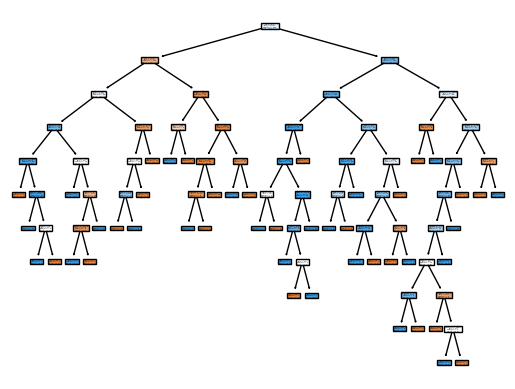

In [270]:
tree.plot_tree(dt_classifier,filled=True, feature_names=x.columns)

In [271]:
dt_classifier.fit(x_train, y_train)
dt_classifier.score(x_train, y_train)

1.0

In [272]:
dt_classifier.score(x_test, y_test)


0.819672131147541

In [273]:
predict_dt_classifier = dt_classifier.predict(x_test)
predict_dt_classifier

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [274]:
cm_dt_classifier = confusion_matrix(y_test, predict_dt_classifier)
cm_dt_classifier

array([[26,  3],
       [ 8, 24]], dtype=int64)

In [275]:
fig = px.imshow(img=cm_dt_classifier, text_auto=True)
fig.show()

In [276]:
tp,fn,fp,tn = cm_dt_classifier.reshape(-1)
print(tp,fn,fp,tn)

26 3 8 24


In [277]:
accuracy_dt = (tp + tn) / (tp + tn + fp + fn)
accuracy_dt

0.819672131147541

In [278]:
precision_dt = tp / (tp + fp)
precision_dt

0.7647058823529411

In [279]:
sensitivity_dt= tp / (tp + fn)
sensitivity_dt

0.896551724137931

In [280]:
Specificity_dt = tn / (tn + fp)
Specificity_dt

0.75

In [281]:
f1_score_dt=(2*precision_dt*sensitivity_dt)/(precision_dt+sensitivity_dt)
f1_score_dt

0.8253968253968255

In [282]:
report_predict_dt_classifier = classification_report(y_test, predict_dt_classifier)
print(report_predict_dt_classifier)

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [283]:
dt_classifier_accuracy = accuracy_score(y_test, predict_dt_classifier)
dt_classifier_accuracy

0.819672131147541

In [284]:
ml_algorithms['Decision Tree'] = dt_classifier_accuracy
print(ml_algorithms)

{'Logistic Regression': 0.8852459016393442, 'Support Vector Machine': 0.8688524590163934, 'Naive bayes': 0.8852459016393442, 'Random forest': 0.8852459016393442, 'K-nearest neighbor algorithm': 0.6885245901639344, 'Decision Tree': 0.819672131147541}


In [285]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np



# Appliquez la validation croisée avec k=5 plis
cv_scores_dt = cross_val_score(dt_classifier, x_train, y_train, cv=5, scoring='accuracy')

# Affichez les scores de validation croisée pour chaque pli
print("Cross-validation scores:", cv_scores_dt)

# Calculez la moyenne des scores de validation croisée
mean_cv_score6 = np.mean(cv_scores_dt)
print("Mean cross-validation score:", mean_cv_score6)

Cross-validation scores: [0.79591837 0.65306122 0.77083333 0.6875     0.75      ]
Mean cross-validation score: 0.7314625850340136


In [286]:
print('Accuracy score: ',accuracy_dt)
print('Precision score: ',precision_dt)
print('sensitivity: ',sensitivity_dt)
print('Specificity: ',Specificity_dt)
print('F1 score: ',f1_score_dt)
print('Mean cross-validation score:',mean_cv_score6)

Accuracy score:  0.819672131147541
Precision score:  0.7647058823529411
sensitivity:  0.896551724137931
Specificity:  0.75
F1 score:  0.8253968253968255
Mean cross-validation score: 0.7314625850340136


# Évaluation des modèles

In [287]:
import pandas as pd

# Créer un DataFrame vide
performance_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score','Mean cross-validation score'])

# Ajouter les performances de chaque modèle
performance_table.loc[0] = ['Logistic Regression', accuracyLR, precisionLR, sensitivityLR, SpecificityLR, f1_scoreLR,mean_cv_score1]
performance_table.loc[1] = ['Support Vector Machine', accuracySVM, precisionSVM, sensitivitySVM, SpecificitySVM, f1_scoreSVM,mean_cv_score2]
performance_table.loc[2] = ['Naive Bayes', accuracy_naive_bayes, precision_naive_bayes, sensitivity_naive_bayes, Specificity_naive_bayes, f1_score_naive_bayes,mean_cv_score3]
performance_table.loc[3] = ['Random Forest', accuracy_RF, precision_RF, sensitivity_RF, Specificity_RF, f1_score_RF,mean_cv_score4]
performance_table.loc[4] = ['K-nearest neighbor algorithm', accuracy_KNN, precision_KNN, sensitivity_KNN, Specificity_KNN, f1_score_KNN,mean_cv_score5]
performance_table.loc[5] = ['Decision Trees', accuracy_dt, precision_dt, sensitivity_dt, Specificity_dt, f1_score_dt,mean_cv_score6]

# Formater les valeurs pour avoir un nombre fixe de décimales
performance_table = performance_table.round({'Accuracy': 4, 'Precision': 4, 'Sensitivity': 4, 'Specificity': 4, 'F1 Score': 4 , 'Mean cross-validation score':4} )

# Aligner les colonnes de manière uniforme
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes sans troncature
pd.set_option('display.width', 1000)  # Largeur de l'affichage

# Afficher la table
print(performance_table)


                          Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score  Mean cross-validation score
0           Logistic Regression    0.8852     0.8929       0.8621       0.9062    0.8772                       0.8139
1        Support Vector Machine    0.8689     0.8621       0.8621       0.8750    0.8621                       0.8139
2                   Naive Bayes    0.8689     0.9000       0.8438       0.8438    0.8710                       0.7890
3                 Random Forest    0.8852     0.8438       0.9310       0.8438    2.5862                       0.8099
4  K-nearest neighbor algorithm    0.6885     0.6923       0.6207       0.7500    0.6545                       0.6488
5                Decision Trees    0.8197     0.7647       0.8966       0.7500    0.8254                       0.7315


In [288]:
data_ml_algorithms = {
    'algorithms': list(ml_algorithms.keys()),
    'accuracy': list(ml_algorithms.values())
}

df_algorithms = pd.DataFrame(data_ml_algorithms)
df_algorithms

,algorithms,accuracy
0,Logistic Regression,0.885246
1,Support Vector Machine,0.868852
2,Naive bayes,0.885246
3,Random forest,0.885246
4,K-nearest neighbor algorithm,0.688525
5,Decision Tree,0.819672


In [289]:
fig = px.bar(df_algorithms,
             x='algorithms',
             y='accuracy',
             title='Accuracy',
             color='algorithms',
             text_auto=True,
             hover_data={'accuracy': ':.16r'},
             height=500,
             width=900)
fig.show()


# **Courbes ROC (Receiver Operating Characteristic)**

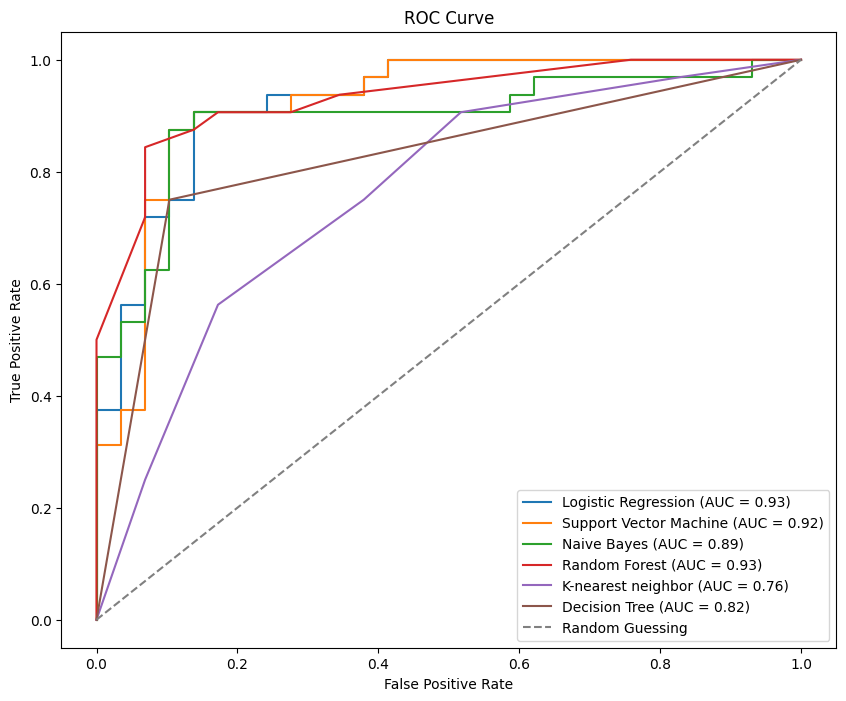

In [290]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression
log_model_probs = log_model.predict_proba(x_test)[:, 1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, log_model_probs)
auc_log = auc(fpr_log, tpr_log)

# Support Vector Machine
svm_probs = svm.decision_function(x_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

# Naive Bayes
naive_bayes_probs = naive_bayes_model.predict_proba(x_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, naive_bayes_probs)
auc_nb = auc(fpr_nb, tpr_nb)

# Random Forest
rf_probs = rf_classifier.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

# K-nearest neighbor algorithm
kn_probs = kn_classifier.predict_proba(x_test)[:, 1]
fpr_kn, tpr_kn, thresholds_kn = roc_curve(y_test, kn_probs)
auc_kn = auc(fpr_kn, tpr_kn)

# Decision Tree
dt_probs = dt_classifier.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_kn, tpr_kn, label=f'K-nearest neighbor (AUC = {auc_kn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


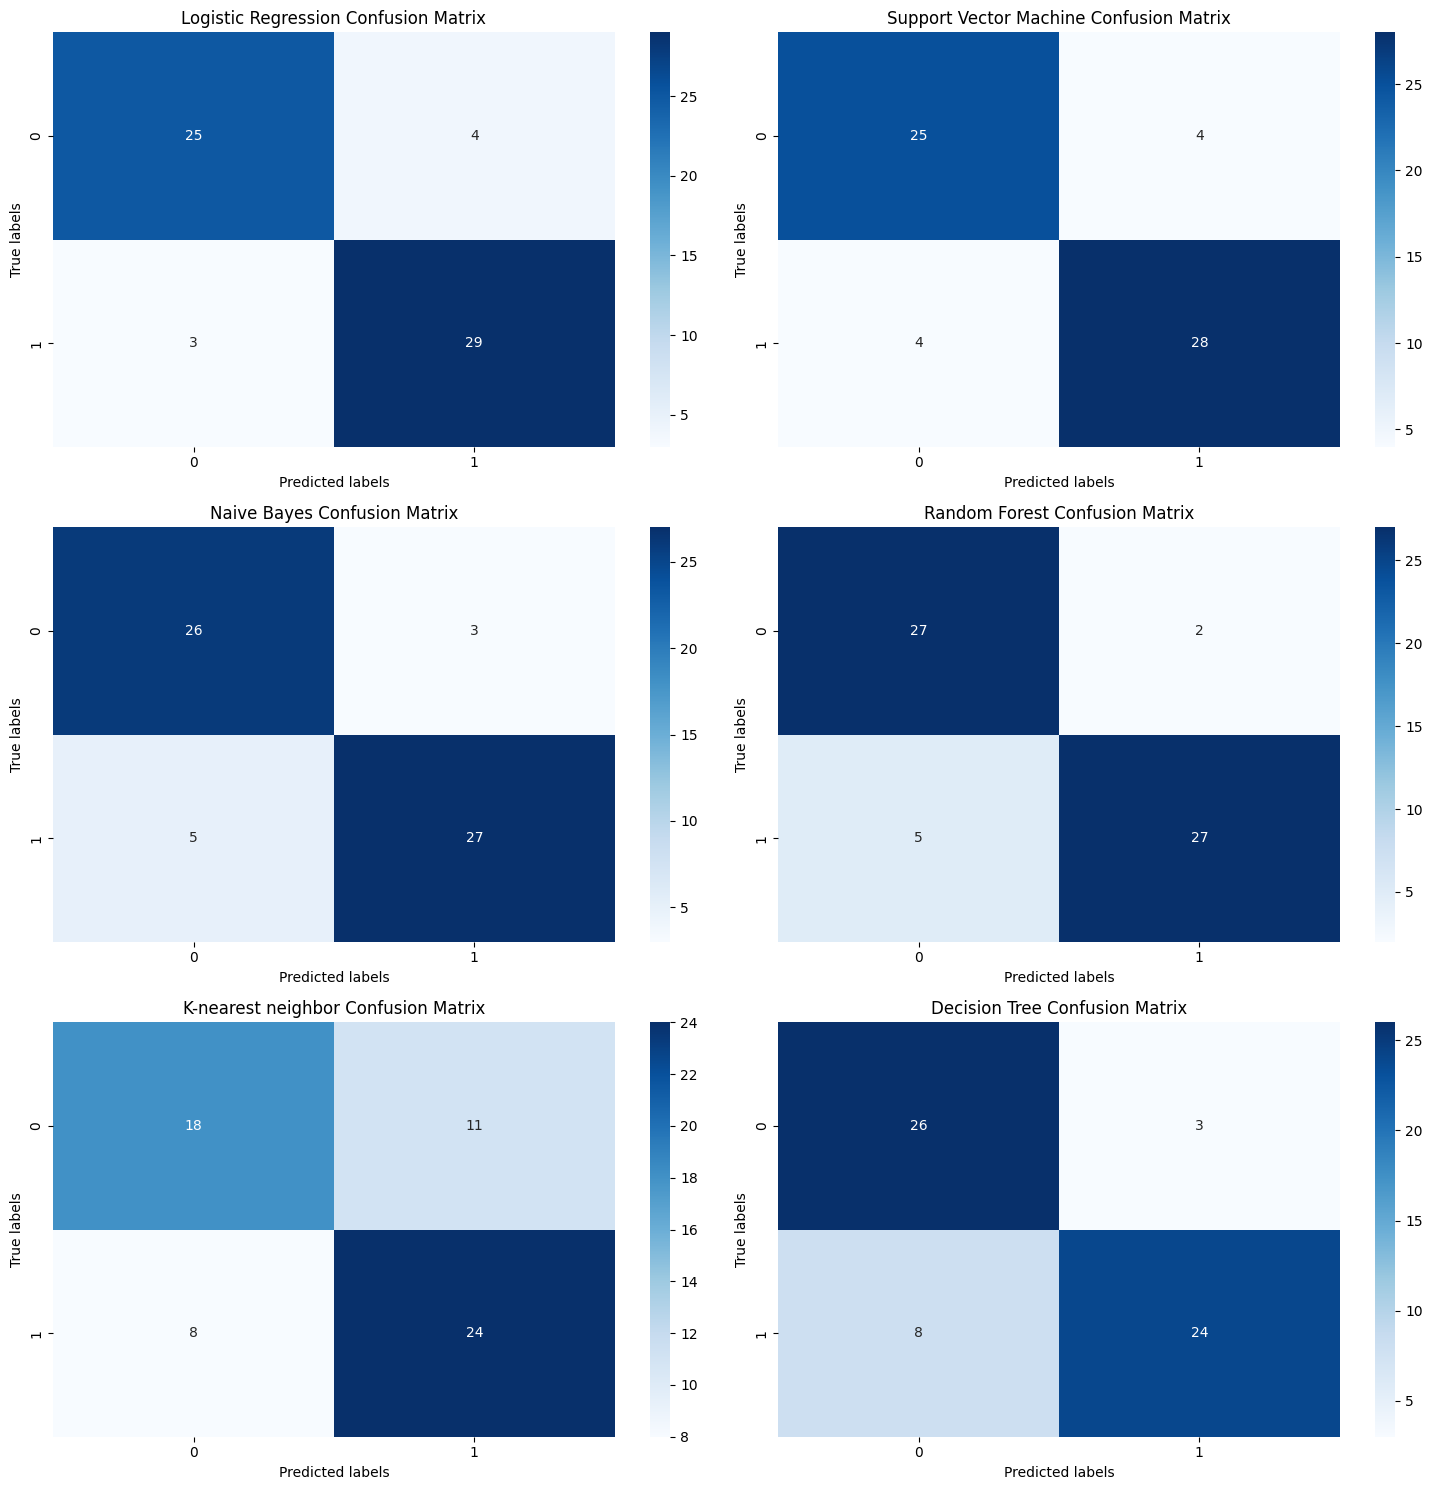

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve


# Définition des modèles
models = {
    "Logistic Regression": log_model,
    "Support Vector Machine": svm,
    "Naive Bayes": naive_bayes_model,
    "Random Forest": rf_classifier,
    "K-nearest neighbor": kn_classifier,
    "Decision Tree": dt_classifier
}

# Création des sous-plots pour chaque métrique
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for ax, (model_name, model) in zip(axs.flat, models.items()):
    # Prédiction du modèle
    y_pred = model.predict(x_test)

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

plt.tight_layout()
plt.show()






# **Courbe PR**

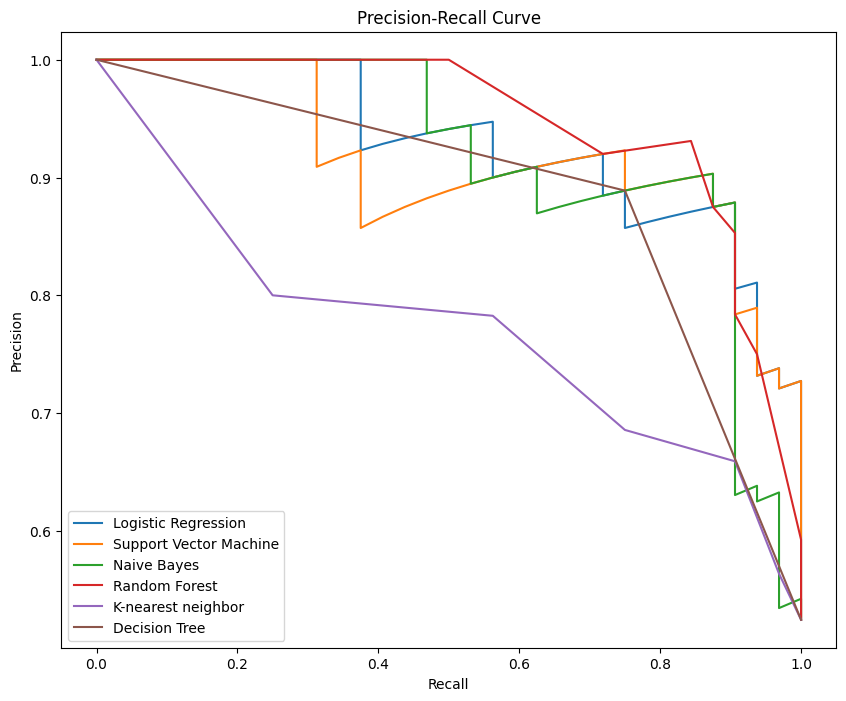

In [293]:
# Courbe PR
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    y_probs = model.predict_proba(x_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    plt.plot(recall, precision, label=model_name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



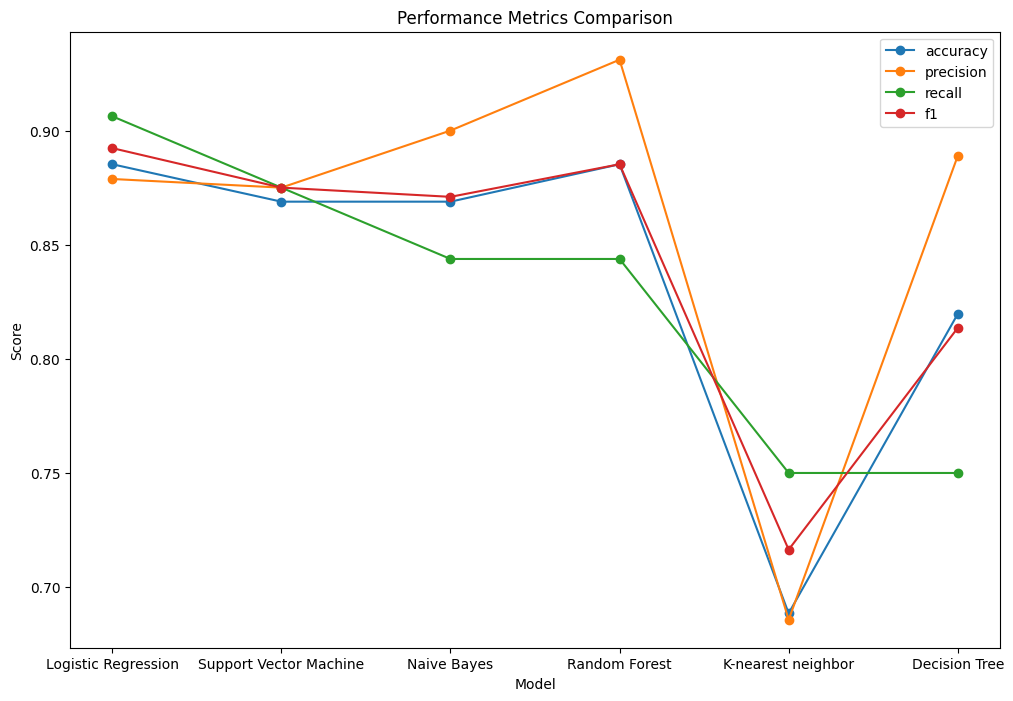

In [294]:
# Courbes de Performance (Accuracy, Precision, Recall, F1-score)
metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(12, 8))
for metric in metrics:
    scores = [eval(f'{metric}_score')(y_test, model.predict(x_test)) for model in models.values()]
    plt.plot(list(models.keys()), scores, marker='o', label=metric)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.show()

Sur la base des performances des différents modèles de classification évalués, nous pouvons tirer les conclusions suivantes :

1. **Régression logistique** :
   - Elle a le meilleur score d'exactitude (Accuracy) parmi tous les modèles évalués, ce qui signifie qu'elle prédit correctement la classe des données dans une plus grande mesure par rapport aux autres modèles.
   - Elle affiche également le meilleur score F1, ce qui indique un bon équilibre entre la précision et la sensibilité.

2. **Machine à vecteurs de support (SVM)** :
   - Bien qu'elle n'ait pas la plus haute exactitude, la SVM montre une précision et une sensibilité assez équilibrées.
   - Son score de validation croisée moyen est relativement élevé, ce qui suggère une bonne généralisation du modèle.

3. **Bayes naïf** :
   - Le modèle Bayesien naïf affiche une précision élevée, mais une sensibilité légèrement inférieure par rapport à la régression logistique.
   - Son score de validation croisée moyen est également assez bon.

4. **Forêt aléatoire** :
   - Bien que la forêt aléatoire ait une sensibilité élevée, elle montre un score F1 relativement faible, ce qui indique un déséquilibre entre la précision et la sensibilité.
   - Son score de validation croisée moyen est notablement plus élevé que les autres modèles, mais il peut être dû à un surajustement.

5. **Algorithme des k plus proches voisins (K-NN)** :
   - Malgré sa sensibilité relativement faible, le K-NN affiche une précision comparable à d'autres modèles.
   - Son score de validation croisée moyen est assez bas, ce qui suggère un risque de surajustement.

6. **Arbres de décision** :
   - Les arbres de décision montrent une sensibilité élevée, mais une précision légèrement inférieure par rapport à d'autres modèles.
   - Leur score de validation croisée moyen est modéré, mais relativement plus faible que celui de certains autres modèles.

En conclusion, la régression logistique semble être le meilleur choix parmi les modèles évalués en raison de son score d'exactitude élevé et de son bon équilibre entre précision et sensibilité. Cependant, il est également important de prendre en compte d'autres facteurs tels que la complexité du modèle et la capacité à généraliser sur de nouvelles données avant de prendre une décision finale sur le choix du modèle.

# Optimisation des hyperparamètres

In [295]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Initialiser le modèle
naive_bayes = GaussianNB()

# Aucun hyperparamètre spécifique à ajuster pour GaussianNB

# Ajuster le modèle aux données
naive_bayes.fit(x_train, y_train)

# Performances du modèle
accuracy1 = naive_bayes.score(x_test, y_test)
print("Accuracy du modèle Naive Bayes:", accuracy1)


Accuracy du modèle Naive Bayes: 0.8688524590163934


In [296]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Définir les hyperparamètres à optimiser
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le modèle
decision_tree = DecisionTreeClassifier()

# Recherche en grille pour l'optimisation des hyperparamètres
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Adapter la recherche en grille aux données
grid_search.fit(x_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

# Afficher les performances du meilleur modèle
accuracy2 = best_model.score(x_test, y_test)
print("Accuracy du meilleur modèle Decision Tree:", accuracy2)





Meilleurs paramètres: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy du meilleur modèle Decision Tree: 0.8524590163934426


In [297]:
# Définir les hyperparamètres à optimiser pour SVM
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Initialiser le modèle
svm = SVC()

# Recherche en grille pour l'optimisation des hyperparamètres
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy')

# Adapter la recherche en grille aux données
grid_search.fit(x_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

# Afficher les performances du meilleur modèle
accuracy3 = best_model.score(x_test, y_test)
print("Accuracy du meilleur modèle SVM:", accuracy3)



Meilleurs paramètres: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy du meilleur modèle SVM: 0.8852459016393442


In [298]:
#Pour le modèle Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Définir les hyperparamètres à optimiser
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le modèle
random_forest = RandomForestClassifier()

# Recherche en grille pour l'optimisation des hyperparamètres
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')

# Adapter la recherche en grille aux données
grid_search.fit(x_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

# Afficher les performances du meilleur modèle
accuracy4 = best_model.score(x_test, y_test)
print("Accuracy du meilleur modèle Random Forest:", accuracy4)



Meilleurs paramètres: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy du meilleur modèle Random Forest: 0.8524590163934426


In [299]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Définir les hyperparamètres à optimiser
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialiser le modèle
knn = KNeighborsClassifier()

# Recherche en grille pour l'optimisation des hyperparamètres
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Adapter la recherche en grille aux données
grid_search.fit(x_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

# Afficher les performances du meilleur modèle
accuracy5 = best_model.score(x_test, y_test)
print("Accuracy du meilleur modèle knn:", accuracy5)



Meilleurs paramètres: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy du meilleur modèle knn: 0.7049180327868853


In [300]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Définir les hyperparamètres à optimiser
param_grid = {
    'solver': ['lbfgs', 'liblinear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300, 400, 500]
}

# Initialiser le modèle
logistic_regression = LogisticRegression()

# Recherche en grille pour l'optimisation des hyperparamètres
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')

# Adapter la recherche en grille aux données
grid_search.fit(x_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

# Afficher les performances du meilleur modèle
accuracy6 = best_model.score(x_test, y_test)
print("Accuracy du meilleur modèle logistic_regression:", accuracy6)



c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Meilleurs paramètres: {'C': 1, 'max_iter': 300, 'solver': 'lbfgs'}
Accuracy du meilleur modèle logistic_regression: 0.8688524590163934


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [301]:
print("Accuracy du meilleur modèle logistic_regression:", accuracy6)
print("Accuracy du meilleur modèle knn:", accuracy5)
print("Accuracy du meilleur modèle Random Forest:", accuracy4)
print("Accuracy du meilleur modèle SVM:", accuracy3)
print("Accuracy du meilleur modèle Decision Tree:", accuracy2)
print("Accuracy du modèle Naive Bayes:", accuracy1)

Accuracy du meilleur modèle logistic_regression: 0.8688524590163934
Accuracy du meilleur modèle knn: 0.7049180327868853
Accuracy du meilleur modèle Random Forest: 0.8524590163934426
Accuracy du meilleur modèle SVM: 0.8852459016393442
Accuracy du meilleur modèle Decision Tree: 0.8524590163934426
Accuracy du modèle Naive Bayes: 0.8688524590163934


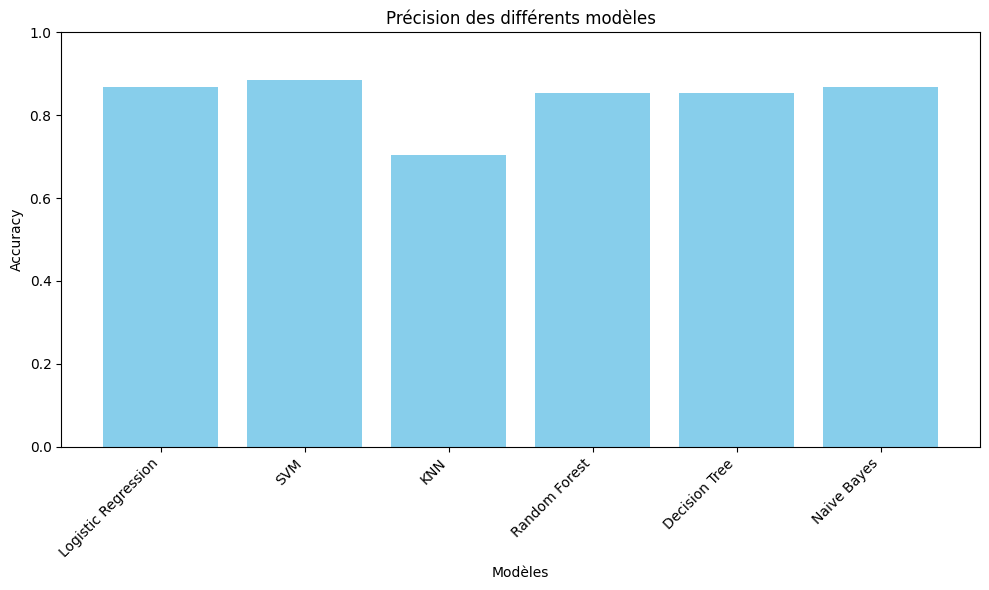

In [302]:
import matplotlib.pyplot as plt

# Précisions des différents modèles
accuracies = [accuracy6, accuracy3 ,accuracy5, accuracy4, accuracy2, accuracy1]
models = ['Logistic Regression','SVM' ,'KNN', 'Random Forest', 'Decision Tree', 'Naive Bayes']

# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.title('Précision des différents modèles')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




Après avoir optimisé les hyperparamètres de plusieurs modèles de machine learning, nous avons observé différentes performances en termes d'exactitude (Accuracy). Voici une brève conclusion sur les performances des meilleurs modèles :

1. Le modèle SVM (Support Vector Machine) a obtenu la plus haute exactitude, avec une valeur de 0.885, ce qui indique une capacité élevée à classer correctement les instances dans les données de test.

2. Les modèles de Régression Logistique et Naive Bayes ont également obtenu une exactitude similaire, avec des valeurs de 0.869. Cela montre que ces modèles ont une capacité de prédiction solide, bien que légèrement inférieure à celle du SVM.

3. Les modèles Decision Tree et Random Forest ont tous deux obtenu une exactitude de 0.852, montrant qu'ils sont également capables de faire des prédictions précises, bien que légèrement moins performants que le SVM et la Régression Logistique.

4. Le modèle KNN (K-Nearest Neighbors) a obtenu la plus faible exactitude, avec une valeur de 0.705. Cela suggère que ce modèle peut avoir du mal à généraliser les schémas présents dans les données de test par rapport aux autres modèles.

En conclusion, le SVM semble être le choix optimal pour la classification de ces données, en raison de sa performance élevée en termes d'exactitude. Cependant, il est important de prendre en compte d'autres facteurs tels que la complexité du modèle, le temps d'entraînement et la facilité d'interprétation lors du choix du modèle final pour une application spécifique.





